In [16]:
%load_ext autoreload
%autoreload 2
import cv2
import numpy as np
import torch
import torch.nn as nn
from utils import *
from dataloaders.RealBlur import *
import matplotlib.pyplot as plt
from torchvision import transforms
import einops
from dataloaders.ColorizationDataset import ColorizationDataset

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
dataset = ColorizationDataset(train=True, width=224, height=224, dataset_root ="/Users/sagarasanghavi/Desktop/Photos")

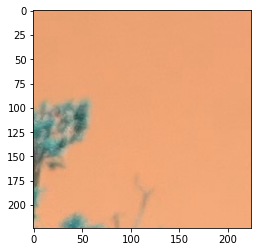

In [18]:
# sanity check
def show_image(img):
    plt.figure()
    plt.imshow(cv2.cvtColor(img.transpose((1, 2, 0)), cv2.COLOR_BGR2RGB))
    plt.show()

bw, gt = dataset[1]

show_image(gt)

In [22]:
from models.unet import *

unet_model = UNet(n_channels=3, n_classes=20, bilinear=False)
bw, gt = dataset[0]
bw_batched = bw[None]

unet_model(bw_batched)

Initializing
in_channels 3
out_channels 64
Initializing
in_channels 64
out_channels 128
Initializing
in_channels 128
out_channels 256
Initializing
in_channels 256
out_channels 512
Initializing
in_channels 512
out_channels 1024
Initializing
in_channels 1024
out_channels 512
Initializing
in_channels 512
out_channels 256
Initializing
in_channels 256
out_channels 128
Initializing
in_channels 128
out_channels 64
(1, 3, 224, 224)
(1, 3, 224, 224)


TypeError: conv2d() received an invalid combination of arguments - got (numpy.ndarray, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!numpy.ndarray!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)


In [23]:
from models.axialtransformer import *

blur, gt = dataset[0]

cropped_image = gt[None, :, :512, :512]
cropped_blur = blur[None, :, :512, :512]

cropped_image_torch = torch.from_numpy(cropped_image).float()
print(cropped_image_torch.shape)
transformer = AxialImageTransformer(dim=128, depth=12, reversible=True)

out = transformer(cropped_image_torch)
print(out.shape)

torch.Size([1, 3, 224, 224])


: 

: 